In [211]:
from enum import Enum
import networkx as nx
import numpy as np
from typing import List

In [212]:
class bloodֹֹֹType(Enum):
    O = 0
    A = 1
    B = 2
    AB = 3

In [213]:
def isMatching(donorType:bloodֹֹֹType, recipientType:bloodֹֹֹType) -> bool:
    if donorType.value == 0:  # donor is O
        return True
    if recipientType.value == 3: # recipient is AB
        return True
    return recipientType.value == donorType.value

In [214]:
def create_random_directed_graph(n:int) -> nx.DiGraph:
    """
    Creates a graph with random vertices and random blood types,
    and there is an edge between u and v if and only if u can donate a kidney to v
    """
    donors = list(map(lambda d: bloodֹֹֹType(d), np.random.randint(len(bloodֹֹֹType), size=n)))
    recipients = list(map(lambda d: bloodֹֹֹType(d), np.random.randint(len(bloodֹֹֹType), size=n)))
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    for u in G.nodes:
        for v in G.nodes:
            if isMatching(donorType=donors[u], recipientType=recipients[v]):
                G.add_edge(u,v)
    return G

In [215]:
def is_there_circle_with_length_smaller_than_2(G:nx.DiGraph, source:int=0) -> bool:
    if source in G.neighbors(source):
        return True
    
    for u in G.neighbors(source):
        if source in G.neighbors(u):
            return True
    
    return False

In [216]:
def get_probability_by_simulation(n:int) -> float: 
    count = 0
    length = 100000
    for i in range(length):
        DG = create_random_directed_graph(n)
        if is_there_circle_with_length_smaller_than_2(DG):
            count+=1
    return count/length

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
def drow_resoults(res:List[float]):
    plt.title(f"The probability of receiving a kidney for a random patient by")
    plt.xlabel("the number of pairs")
    plt.ylabel("probability")
    length = len(res)
    plt.plot(list(range(1, length+1)), res)
    eps = 0.01
    for n in range(1, length+1):
        if n < 10 or (n % 2 == 0 and n < 15) or n % 5 == 0:
            p  = '%.3f' % res[n-1]
            plt.text(n-eps, res[n-1]-eps, f'p({n})={p}')
    plt.show()

In [218]:
def drow_table_of_results(res_simulation:List[float], res_by_function:List[float],):
    data = np.column_stack((np.arange(1,len(res_simulation)+1), res_simulation, res_by_function))
    _, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    ax.table(cellText=data, colLabels=['n', 'P(n) simulation', 'P(n) function'], loc='center')

    plt.show()

In [219]:
def get_probability_function(n:int) ->float:
    return 1 - (4*14**(n-1) + 2*12**(n-1) + 15**(n-1)) / (16**n)   

In [220]:
def get_resluts(max_n,f):
    res = []
    for n in range(1, max_n):
        p = f(n)
        res.append(p)
        if p > 0.99:
            break
    return res

In [221]:
res_simulation = get_resluts(max_n=50,f=get_probability_by_simulation)
res_by_function = get_resluts(max_n=50,f=get_probability_function)

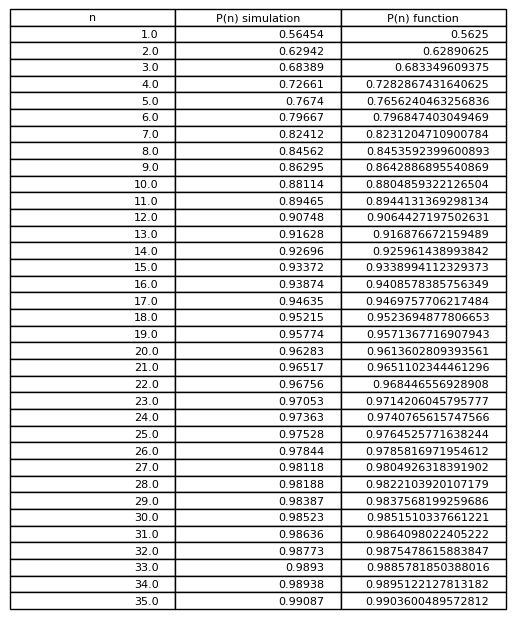

In [222]:
drow_table_of_results(res_simulation, res_by_function)

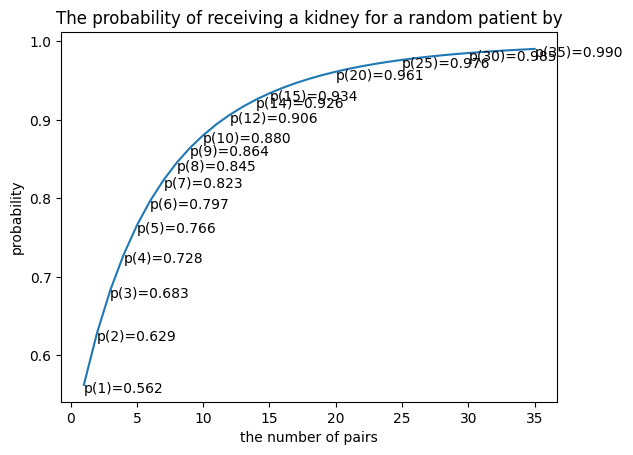

In [223]:
drow_resoults(res_by_function)

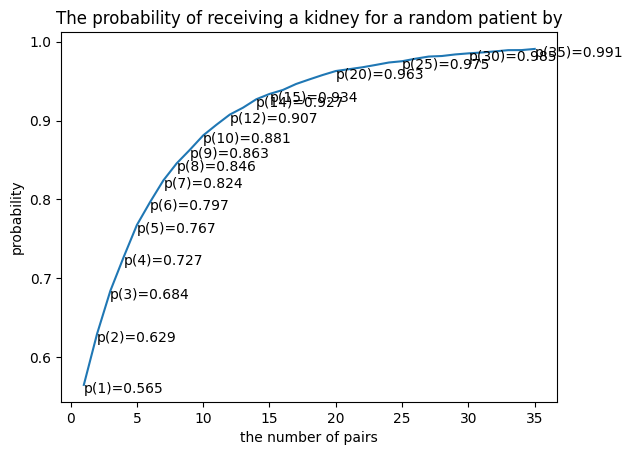

In [224]:
drow_resoults(res_simulation)